First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa   

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   speci

C:\Users\yidne\AppData\Local\Temp\ipykernel_2928\1318570679.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('species').mean()


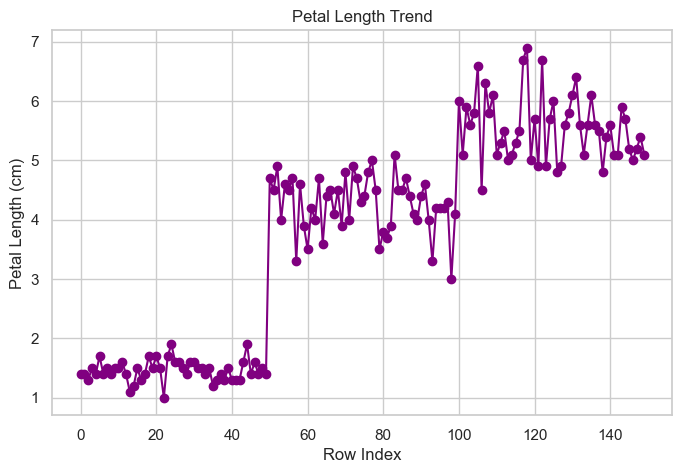

C:\Users\yidne\AppData\Local\Temp\ipykernel_2928\1318570679.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped['sepal width (cm)'], palette="viridis")


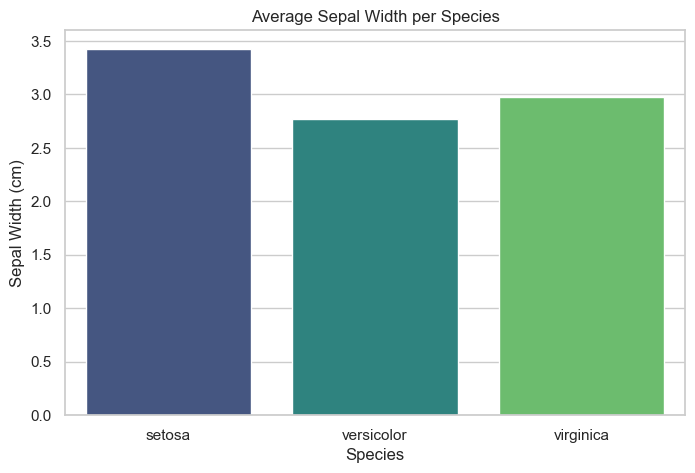

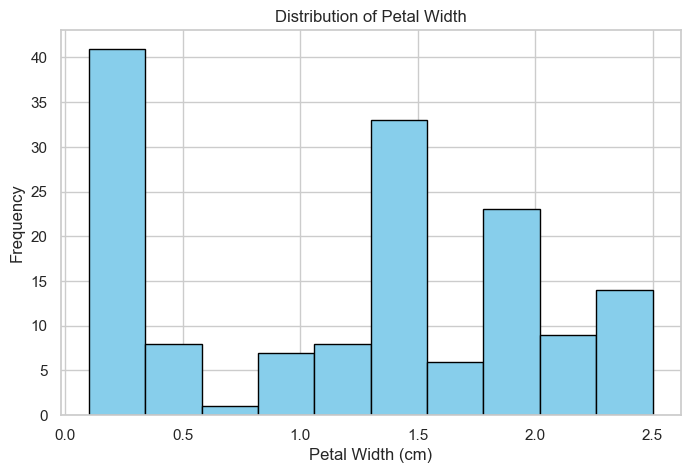

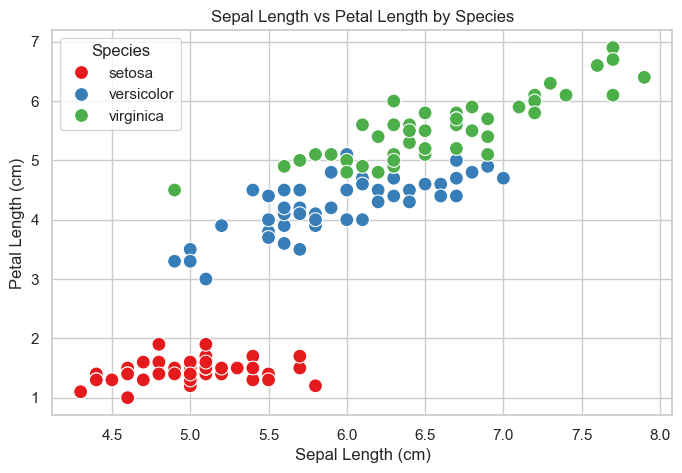

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# =========================
# Task 1: Load and Explore the Dataset
# =========================

try:
    # Load Iris dataset from sklearn
    iris = load_iris()
    # Convert to pandas DataFrame
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

    # Display first few rows
    print("First 5 rows of the dataset:")
    print(df.head(), "\n")

    # Check data types and missing values
    print("Dataset info:")
    print(df.info(), "\n")
    print("Missing values per column:")
    print(df.isnull().sum(), "\n")

except Exception as e:
    print("Error loading dataset:", e)

# =========================
# Task 2: Basic Data Analysis
# =========================

# Basic statistics
print("Basic statistics for numerical columns:")
print(df.describe(), "\n")

# Group by species and calculate mean of numerical columns
grouped = df.groupby('species').mean()
print("Mean values per species:")
print(grouped, "\n")

# Observations
print("Observations:")
print("- Setosa species has smaller petal length and width compared to others.")
print("- Versicolor and Virginica are larger in petal dimensions, Virginica being the largest.\n")

# =========================
# Task 3: Data Visualization
# =========================

# Set seaborn style
sns.set(style="whitegrid")

# 1) Line chart: petal length trend across rows
plt.figure(figsize=(8,5))
plt.plot(df.index, df['petal length (cm)'], marker='o', linestyle='-', color='purple')
plt.title("Petal Length Trend")
plt.xlabel("Row Index")
plt.ylabel("Petal Length (cm)")
plt.show()

# 2) Bar chart: average sepal width per species
plt.figure(figsize=(8,5))
sns.barplot(x=grouped.index, y=grouped['sepal width (cm)'], palette="viridis")
plt.title("Average Sepal Width per Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width (cm)")
plt.show()

# 3) Histogram: distribution of petal width
plt.figure(figsize=(8,5))
plt.hist(df['petal width (cm)'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Petal Width")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Frequency")
plt.show()

# 4) Scatter plot: sepal length vs petal length colored by species
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette="Set1", s=100)
plt.title("Sepal Length vs Petal Length by Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()
